# Assignment for Week 3

## Purpose:
This assignment is intended to help you do the following:
1.	Become familiar with the Seaborn package
2.	Learn to visualize data using Seaborn
3.	Distinguish between various charts and when to utilize them


## Action Items:
•	Create three different charts using Seaborn package.   
  1. Create three different meaningful charts using Seaborn package on your selected data set.      
  2. Explain when is best to use      
  3. Post your work in GitHub     
  4. Add a README file     


In [0]:
# Let's import the required dataset and load pandas features required for our Week 3 Assignment
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
from pandas import set_option
import pandas.util.testing as tm
plt.style.use('ggplot')
set_option('display.width', 100)
set_option('precision', 2)

df = pd.read_csv('https://raw.githubusercontent.com/frankData612/data_612/master/State_Drug_Utilization_Data_2010/State_Drug_Utilization_Data_2010.csv')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# Let's see the first three rows of the Dataset
df.head(15)


,Unnamed: 0,Utilization Type,State,Labeler Code,Product Code,Package Size,Year,Quarter,Product Name,Units Reimbursed,Suppression Used,Number of Prescriptions,Total Amount Reimbursed,Medicaid Amount Reimbursed,Non Medicaid Amount Reimbursed,Quarter Begin,Quarter Begin Date,Latitude,Longitude,Location,NDC
0,128037,MCOU,MA,37205,137,5,2010,4,ARTIFICIAL,15.00,False,1,4.08,4.08,0.00,10/1,10/01/2010,31.18,-91.87,"(31.1801, -91.8749)",37205013705
1,491755,FFSU,FL,62756,763,88,2010,1,TORSEMIDE,255.00,False,8,103.33,103.33,0.00,1/1,01/01/2010,39.35,-75.51,"(39.3498, -75.5148)",62756076388
2,2568076,FFSU,UT,46987,323,11,2010,2,Kadian Ora,120.00,False,2,905.24,905.24,0.00,4/1,04/01/2010,44.29,-99.46,"(44.2853, -99.4632)",46987032311
3,491263,FFSU,MN,781,5185,1,2010,4,LEVOTHYROX,1114.00,False,34,312.22,306.22,6.00,10/1,10/01/2010,43.35,-84.56,"(43.3504, -84.5603)",781518501
4,836489,FFSU,XX,51552,809,6,2010,2,COLD CREAM,226.09,False,7,52.87,52.87,0.00,4/1,04/01/2010,NaN,NaN,NaN,51552080906
5,2468555,FFSU,WI,143,1785,1,2010,3,BUTALBITAL,5138.00,False,82,1071.43,951.92,119.51,7/1,07/01/2010,37.77,-78.21,"(37.768, -78.2057)",143178501
6,73349,FFSU,WI,45802,257,42,2010,1,MOMETASONE,12030.00,False,92,2527.49,2352.86,174.63,1/1,01/01/2010,37.77,-78.21,"(37.768, -78.2057)",45802025742
7,1166159,FFSU,MI,527,586,10,2010,2,DICYCLOMIN,120.00,False,3,14.43,14.43,0.00,4/1,04/01/2010,44.61,-69.40,"(44.6074, -69.3977)",527058610
8,2326672,FFSU,NE,68382,30,1,2010,1,METFORMIN,2029.00,False,35,367.55,367.55,0.00,1/1,01/01/2010,35.64,-79.84,"(35.6411, -79.8431)",68382003001
9,413825,FFSU,MI,172,4366,60,2010,3,LABETALOL,4657.00,False,51,1605.45,1556.07,49.38,7/1,07/01/2010,44.61,-69.40,"(44.6074, -69.3977)",172436660


In [0]:
# Let's print the Column Headings
print(df.columns)


Index(['Unnamed: 0', 'Utilization Type', 'State', 'Labeler Code', 'Product Code', 'Package Size',
       'Year', 'Quarter', 'Product Name', 'Units Reimbursed', 'Suppression Used',
       'Number of Prescriptions', 'Total Amount Reimbursed', 'Medicaid Amount Reimbursed',
       'Non Medicaid Amount Reimbursed', 'Quarter Begin', 'Quarter Begin Date', 'Latitude',
       'Longitude', 'Location', 'NDC'],
      dtype='object')


Action Items for this week's assignment are to create three meaningful charts from our data set. I want to see the Top 10 States for Total Number of Prescriptions issued, I want to see the frequency of the Product Name (the Meds prescribed), and lastly I want to see the Medicaid Reimbusement vs. the Type of Product used (Meds prescribed). After the charts are posted I will provide a short summary to round out the week's assignment requirements.

In [0]:
# Let's see what our data looks like (Statistically)for the number of prescriptions and remove any null values
print(df['NDC'].nunique())
by_state = df.groupby('State')['NDC'].nunique()
print(by_state.describe().T) 

27376
count      52.00
mean     2678.37
std      1379.28
min       940.00
25%      1861.00
50%      2481.50
75%      2980.50
max      9248.00
Name: NDC, dtype: float64


In [0]:
# Let's remove the nulls
df = df.dropna()



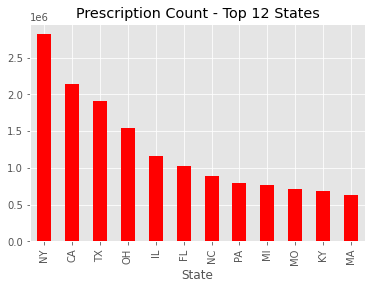

In [0]:
# Let's see the Prescription counts by the Top Twelve States
df = df.groupby('State') ['Number of Prescriptions'].sum()
df = df.nlargest(12)
df.plot(kind='bar', x='State', y='Number of Prescriptions', color='red')
plt.title('Prescription Count - Top 12 States')
plt.show()

In [0]:
# Next, Let's look at a Histograsm of Medications
df = pd.read_csv('https://raw.githubusercontent.com/frankData612/data_612/master/State_Drug_Utilization_Data_2010/State_Drug_Utilization_Data_2010.csv')




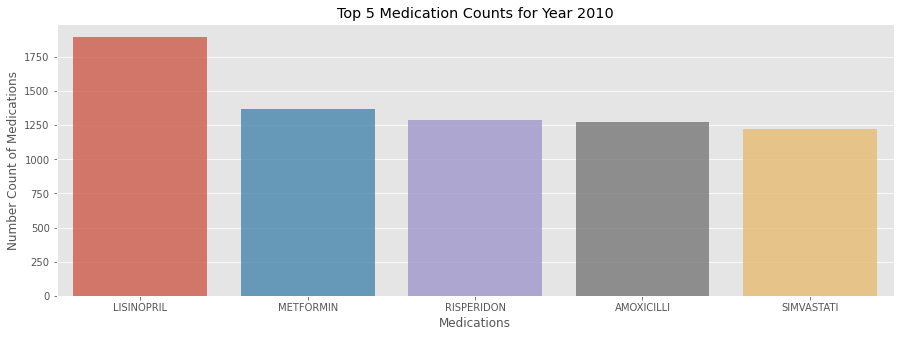

In [0]:
# Let's see the Top 10 Medications that are Prescribed 
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
product_count = df['Product Name'].value_counts()
product_count = product_count[:5,]
plt.figure(figsize=(15,5))
sns.barplot(product_count.index, product_count.values, alpha=0.8)
plt.title('Top 5 Medication Counts for Year 2010')
plt.ylabel('Number Count of Medications', fontsize=12)
plt.xlabel('Medications', fontsize=12)
plt.show()





So, this chart shows us the Top 5 medications that are prescribed. LISINOPRIL, METFORMIN, and RISPERIDON make up the top three. Lisinopril is used to treat Hypertension (High Blood Pressure), Metformin is used to treat Type II Diabetics (Controls Blood Sugar), and Risperidone is used to treat mental/mood disorders, such as Bipolar disorder and Autistic disorder in adults. I find it interesting that a high number of people have high blood pressure followed by folks being Type II Diabetics, with Mental Disorders rounding out the top three medications prescribed.

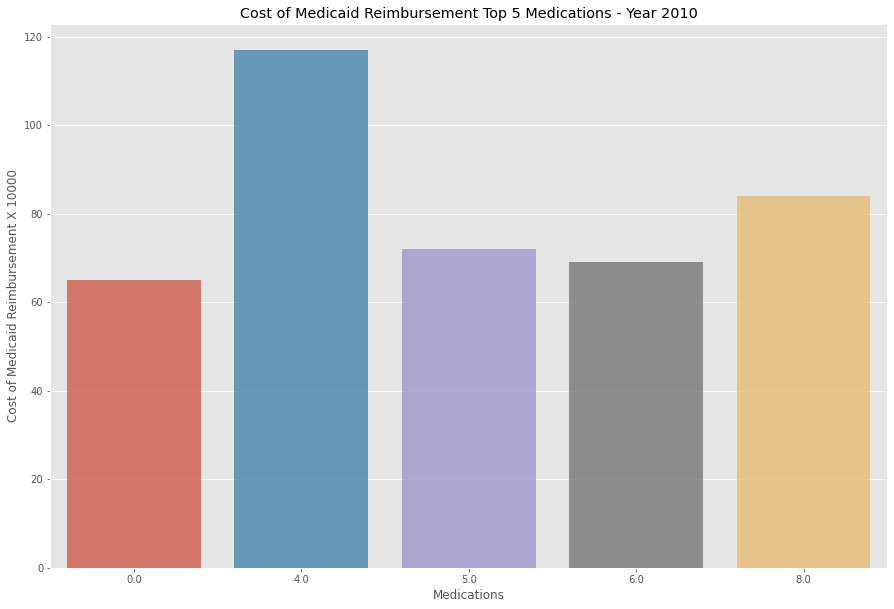

In [0]:
# Let's see the plot of Medicaid Reimbursement vs. the Top 10 Medications
cost_count = df['Medicaid Amount Reimbursed'].value_counts()
cost_count = cost_count[:5,]
plt.figure(figsize=(15, 10))
sns.barplot(cost_count.index, cost_count.values, alpha=0.8)
plt.title('Cost of Medicaid Reimbursement Top 5 Medications - Year 2010')
plt.ylabel('Cost of Medicaid Reimbursement X 10000', fontsize=12)
plt.xlabel('Medications', fontsize=12)
plt.show()

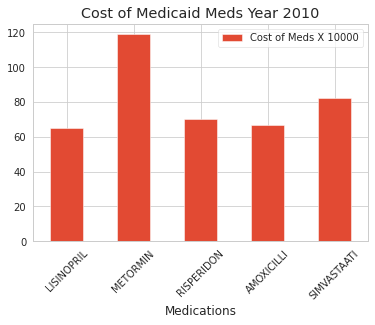

In [0]:
# Let's see another way to view the Top 5 Medications and their associated costs
data = {"Medications":["LISINOPRIL", "METORMIN", "RISPERIDON", "AMOXICILLI", "SIMVASTAATI"], 
        "Cost of Meds X 10000":[65, 119, 70, 67, 82]};
dataFrame = pd.DataFrame(data=data);
dataFrame.plot.bar(x="Medications", y="Cost of Meds X 10000", rot=45, title="Cost of Medicaid Meds Year 2010");
plt.show(block=True);


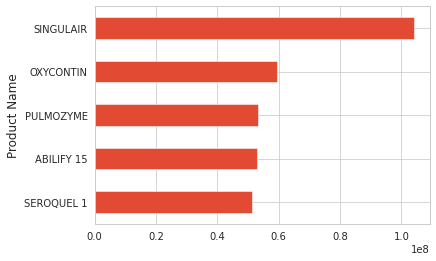

In [0]:
# Let's see a horizontal view of the prescription medications using the ".tail(5)" syntax
x = df.groupby('Product Name')['Medicaid Amount Reimbursed'].sum().sort_values().tail(5)
x.plot(kind='barh')

In [0]:
# Let's see if we can construct some pair plots
df.groupby(['Year', 'Quarter']) [['Number of Prescriptions', 'Medicaid Amount Reimbursed']].mean()

Number of Prescriptions  Medicaid Amount Reimbursed
Year Quarter                                                     
2010 1                         270.91                    17560.91
     2                         335.03                    23397.38
     3                         316.29                    20645.83
     4                         338.12                    21477.89

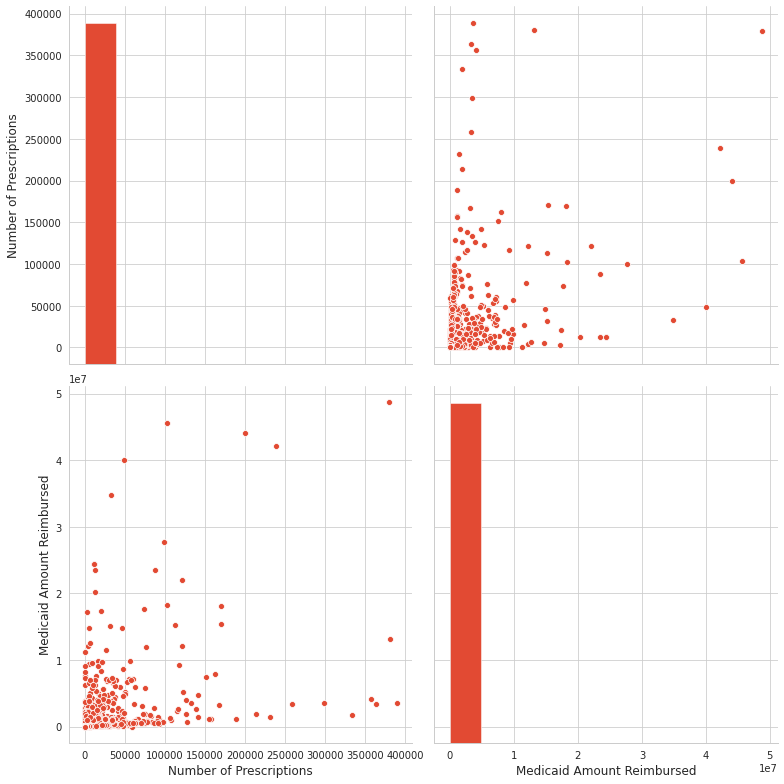

In [0]:
# Pairplots comparision of Number of Prescriptions to Medicaid Amount Reimbursed
cols = ['Number of Prescriptions', 'Medicaid Amount Reimbursed']
sns.pairplot(df[cols], height=5.5)
plt.tight_layout()
plt.show()

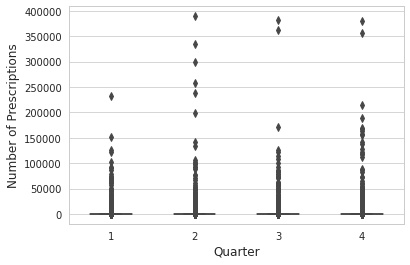

In [0]:
# Boxplot of the Number of Prescriptions per Quarter for 2010
sns.set_style("whitegrid")
sns.boxplot( x='Quarter', y='Number of Prescriptions', data=df, width=0.5)
plt.show()

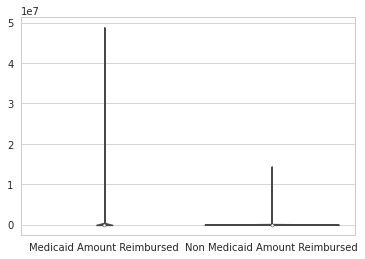

In [0]:
# Boxplot Number 2 (Violin Plot) of Medicaid Amount Reimbursed against Non Medicaid Amount Reimbursed for 2010
stats_df = df.drop(['Unnamed: 0', 'Utilization Type', 'Labeler Code', 'Product Code', 'Package Size',
                  'Units Reimbursed', 'Suppression Used', 'Total Amount Reimbursed', 'Quarter Begin',
                  'Latitude', 'Year', 'Quarter', 'Number of Prescriptions', 'Longitude','Location', 'NDC'], axis=1)
sns.violinplot(data=stats_df)

(0.0, 14393262.3)

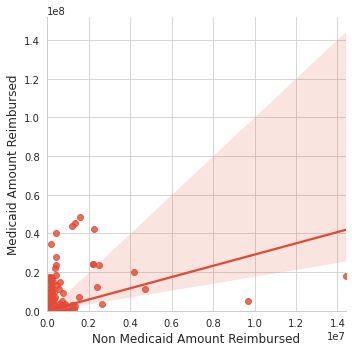

In [0]:
# Scatter Plot Medicaid Amount Reimbursed vs. Non Medicaid Amount Reimbursed for 2010
sns.lmplot(x='Non Medicaid Amount Reimbursed', y='Medicaid Amount Reimbursed', data=df)
plt.ylim(0, None)
plt.xlim(0, None)

**Summary:**    Initially I loaded the 2010 State Drug Utilization Dataset, and then I did a "df.head(15)" to remind myself of how the data is structured. Next, I printed out the Column Headings. After that I moved into prepping the dataset for the initial bar chart using the basic "plt" syntax to construct the visualization. I followed this up with constructing the next bar chart using seaborn. The first chart (using "plt" syntax) shows the relationship between the Prescription Totals for each of the Top 12 States by total count of prescriptions. The next bar chart (using seaborn) shows the Top 5 Medication counts associated with the 2010 State Drug Utilization Dataset. Seaborn is does a better job of adding color and allowing other modifications to the chart presentation. 
Next, I used seaborn to construct a Cost Releationship for the Top Five Medications prescribed from this dataset. I followed this up with a basic "plt" plot of the same information to compare and contrast the two methods for chart construction. Nest, I tried the ".tail(5)" syntax coupled with the "barh" syntax for a baisc "plt" plot, again to drw a comparision between seaborn and basic plot syntax. 
I followed this up with a seaborn "pairplot" to draw a comparision between the total number of prescriptions vs. the amount reimbursed to Medicaid. The scatter plot gives a better feel for how the number of prescription drugs can be visualized. 
Next, I used seavorn to construct a boxplot with the intent of showing the difference between each quarter and the total number of prescriptions written. Whiel the plots give a graph visualization the plots are too squashed to give a prefect boxplot visualiazation of these two data points.
I followed up with trying to use seaborn once agin to construct a violin plot, but here again the output was too squashed to givea prefect visualiztion of the two data points (Medicaid Amount Reimbursed vs. Non Medicaid Amount Reimbursed).
Finally, I used a simple scatter plot between these two cost reimbursements in an effort to show the relationship between the two cost reimbursement methods.
 